<a href="https://colab.research.google.com/github/BishulaTech-X/diabetes-detection-ML/blob/main/diabetesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               868 non-null    int64  
 1   Glucose                   868 non-null    int64  
 2   BloodPressure             868 non-null    int64  
 3   SkinThickness             868 non-null    int64  
 4   Insulin                   868 non-null    int64  
 5   BMI                       868 non-null    float64
 6   DiabetesPedigreeFunction  868 non-null    float64
 7   Age                       868 non-null    int64  
 8   Outcome                   868 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 61.2 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,4.388249,121.444700,72.458525,29.049539,138.540323,32.404441,0.470334,35.420507,0.354839
std,3.925806,30.609614,12.068504,8.797273,88.399766,6.868160,0.330905,13.875518,0.478740
min,0.000000,35.000000,24.000000,5.000000,-132.000000,14.241300,-0.263342,21.000000,0.000000
25%,1.000000,99.750000,64.000000,24.000000,111.750000,27.500000,0.240021,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.386500,31.000000,0.000000
75%,7.000000,140.250000,80.000000,33.000000,140.000000,36.600000,0.632425,43.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# (row, columns)
df.shape

(868, 9)

In [8]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

,count
Outcome,
0,64.516129
1,35.483871


In [9]:
df['Outcome'].value_counts()*100/len(df)

,count
Outcome,
0,64.516129
1,35.483871


<Axes: xlabel='Age', ylabel='Count'>

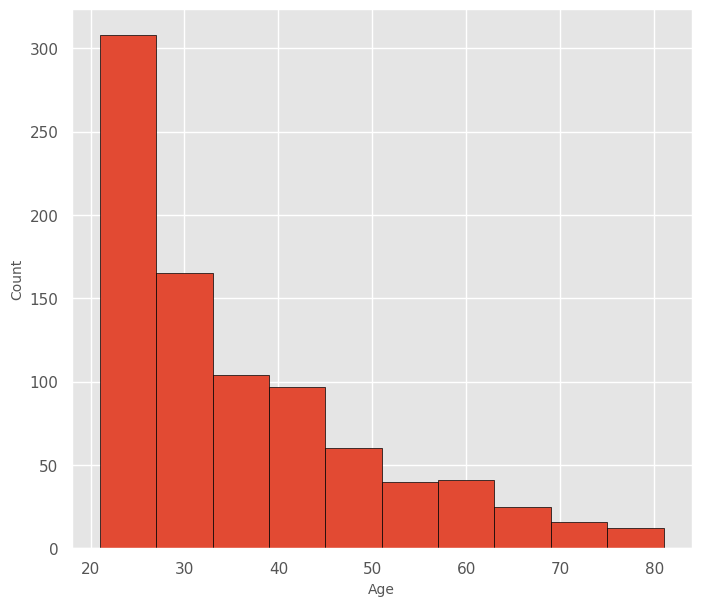

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [12]:
df['Age'].max()


81

In [13]:

df['Age'].min()

21

In [14]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [15]:

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

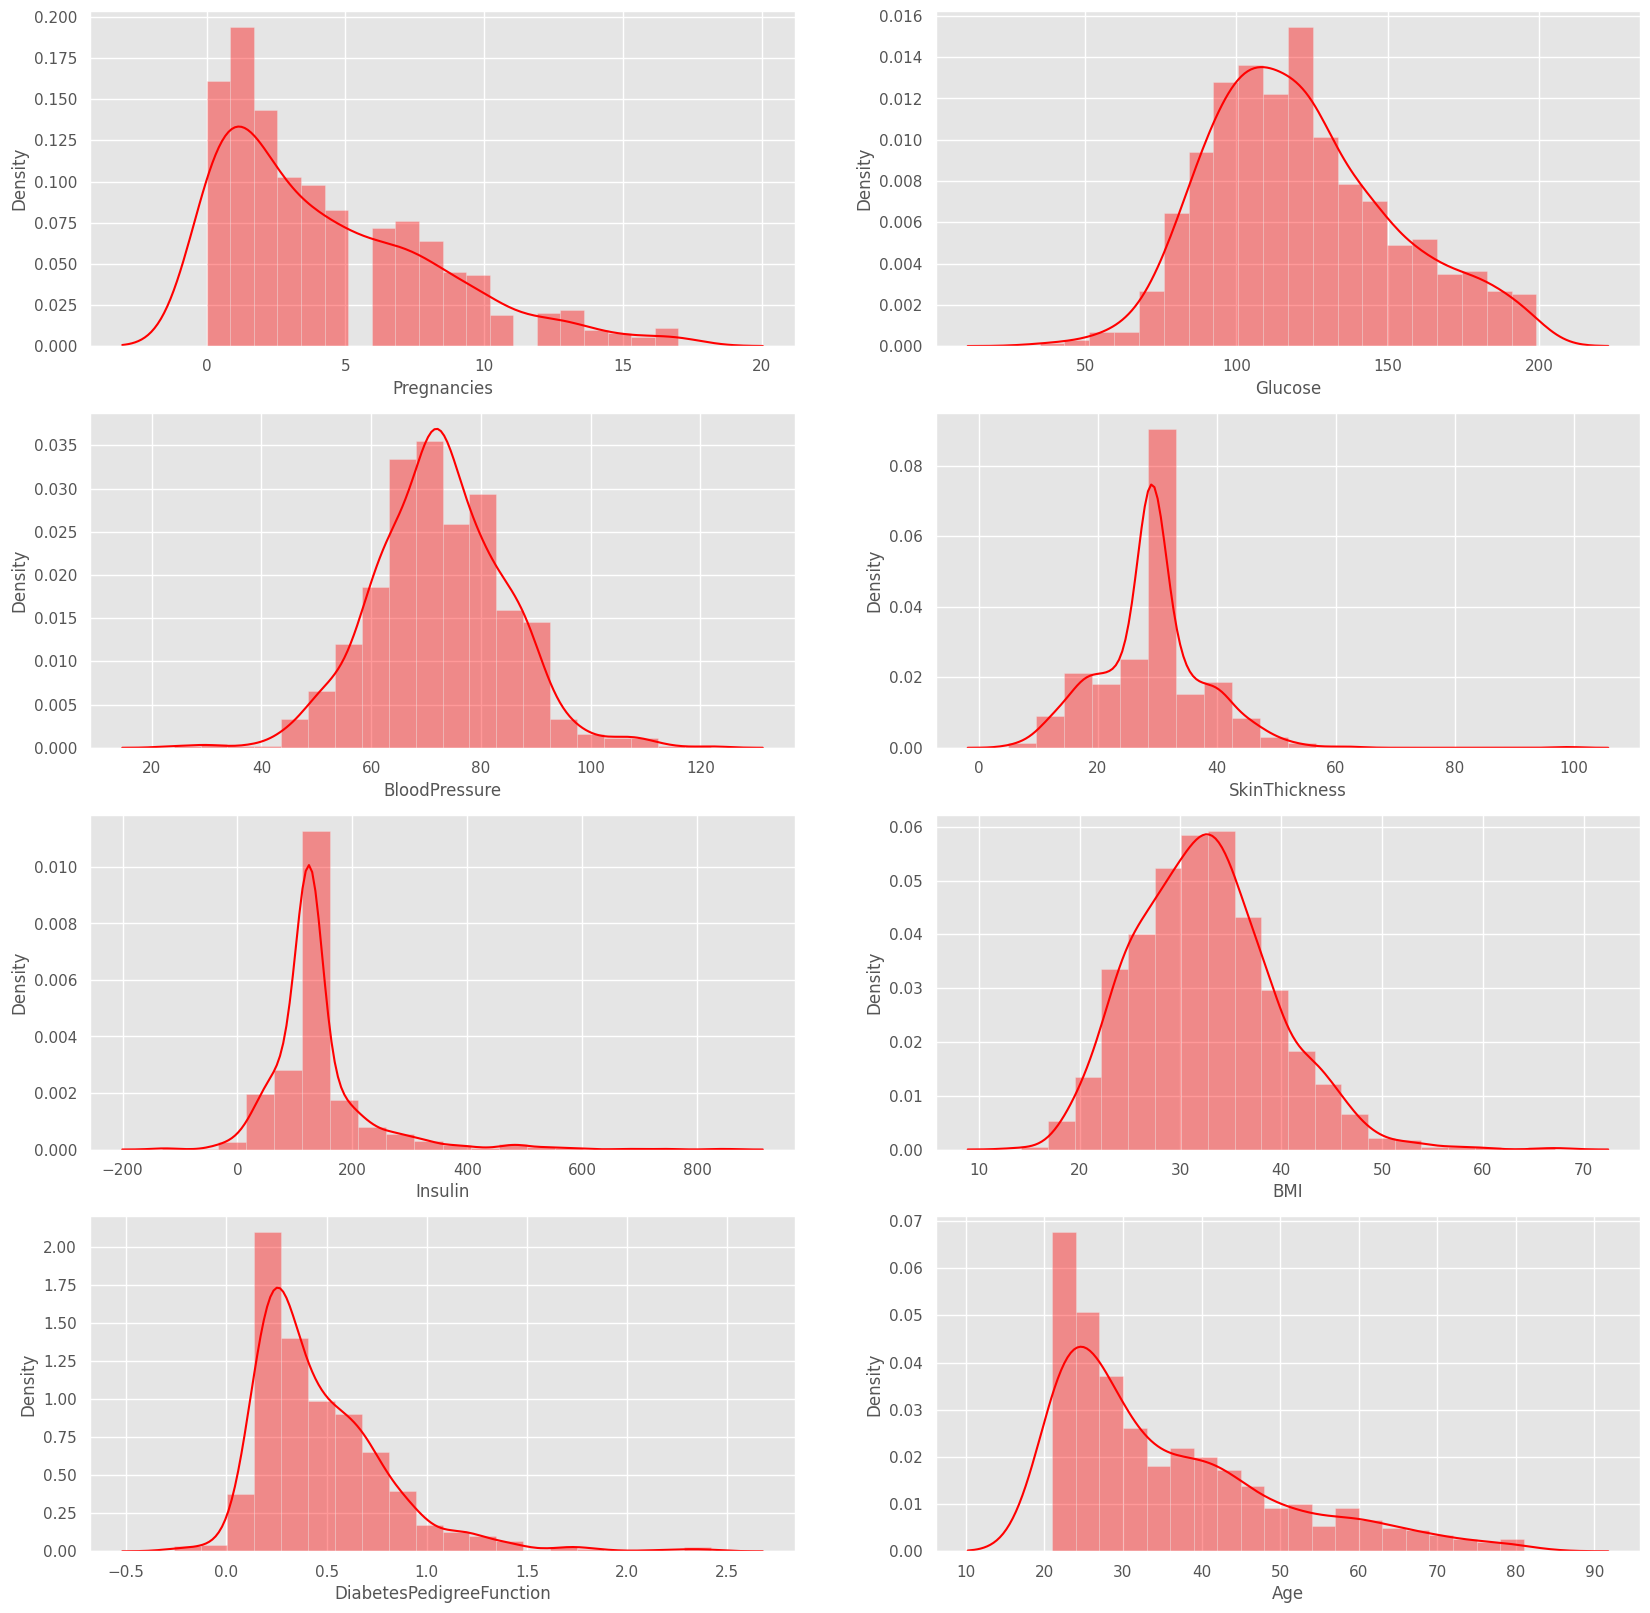

In [16]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.850000
1,5.366883


In [19]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,17
1,17


In [20]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,199
1,199


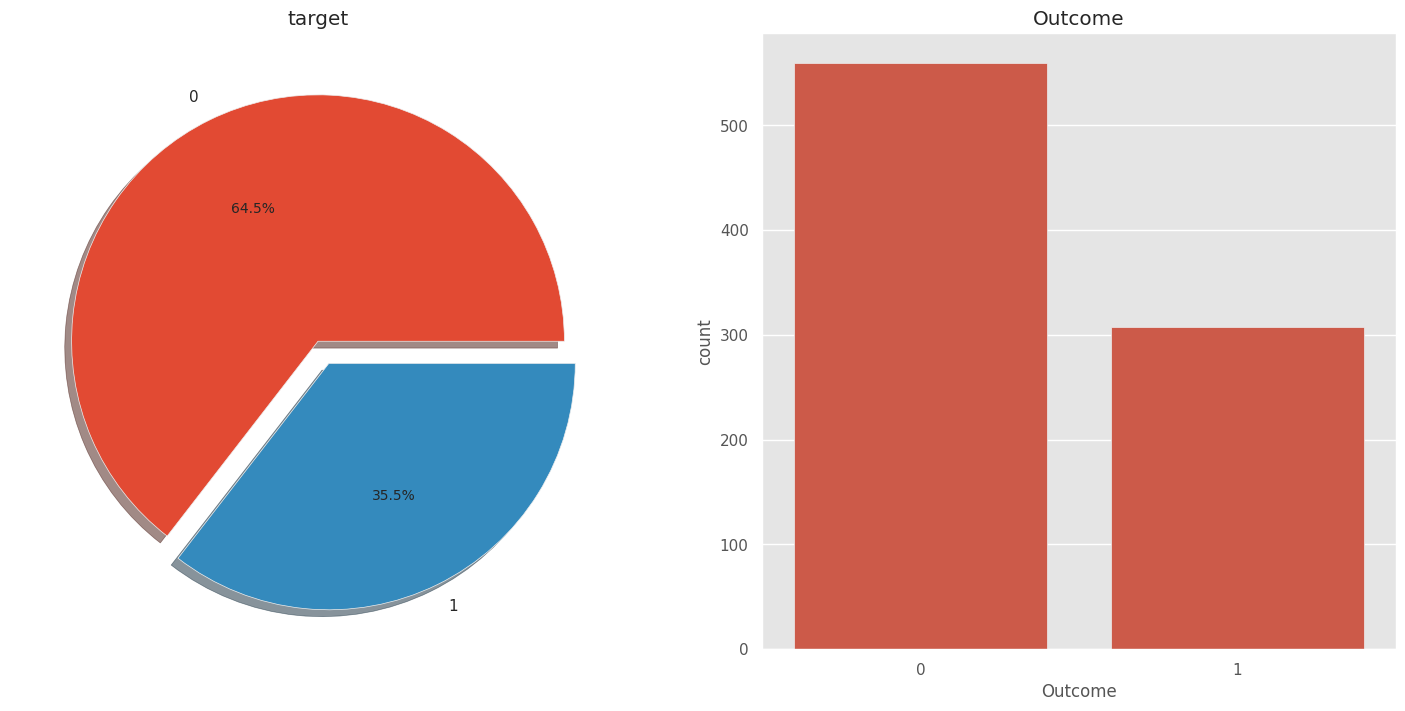

In [22]:
# 0>healthy
# 1>diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.087691,0.194596,0.050539,0.009881,0.032616,-0.029620,0.488236,0.184979
Glucose,0.087691,1.000000,0.188600,0.181567,0.368025,0.199506,0.100902,0.194252,0.408816
BloodPressure,0.194596,0.188600,1.000000,0.179353,0.067961,0.257418,0.001712,0.246896,0.127319
SkinThickness,0.050539,0.181567,0.179353,1.000000,0.126928,0.481872,0.094698,0.077188,0.178488
Insulin,0.009881,0.368025,0.067961,0.126928,1.000000,0.173045,0.119489,0.043706,0.149749
BMI,0.032616,0.199506,0.257418,0.481872,0.173045,1.000000,0.158531,0.001254,0.263294
DiabetesPedigreeFunction,-0.029620,0.100902,0.001712,0.094698,0.119489,0.158531,1.000000,0.026521,0.179836
Age,0.488236,0.194252,0.246896,0.077188,0.043706,0.001254,0.026521,1.000000,0.183614
Outcome,0.184979,0.408816,0.127319,0.178488,0.149749,0.263294,0.179836,0.183614,1.000000


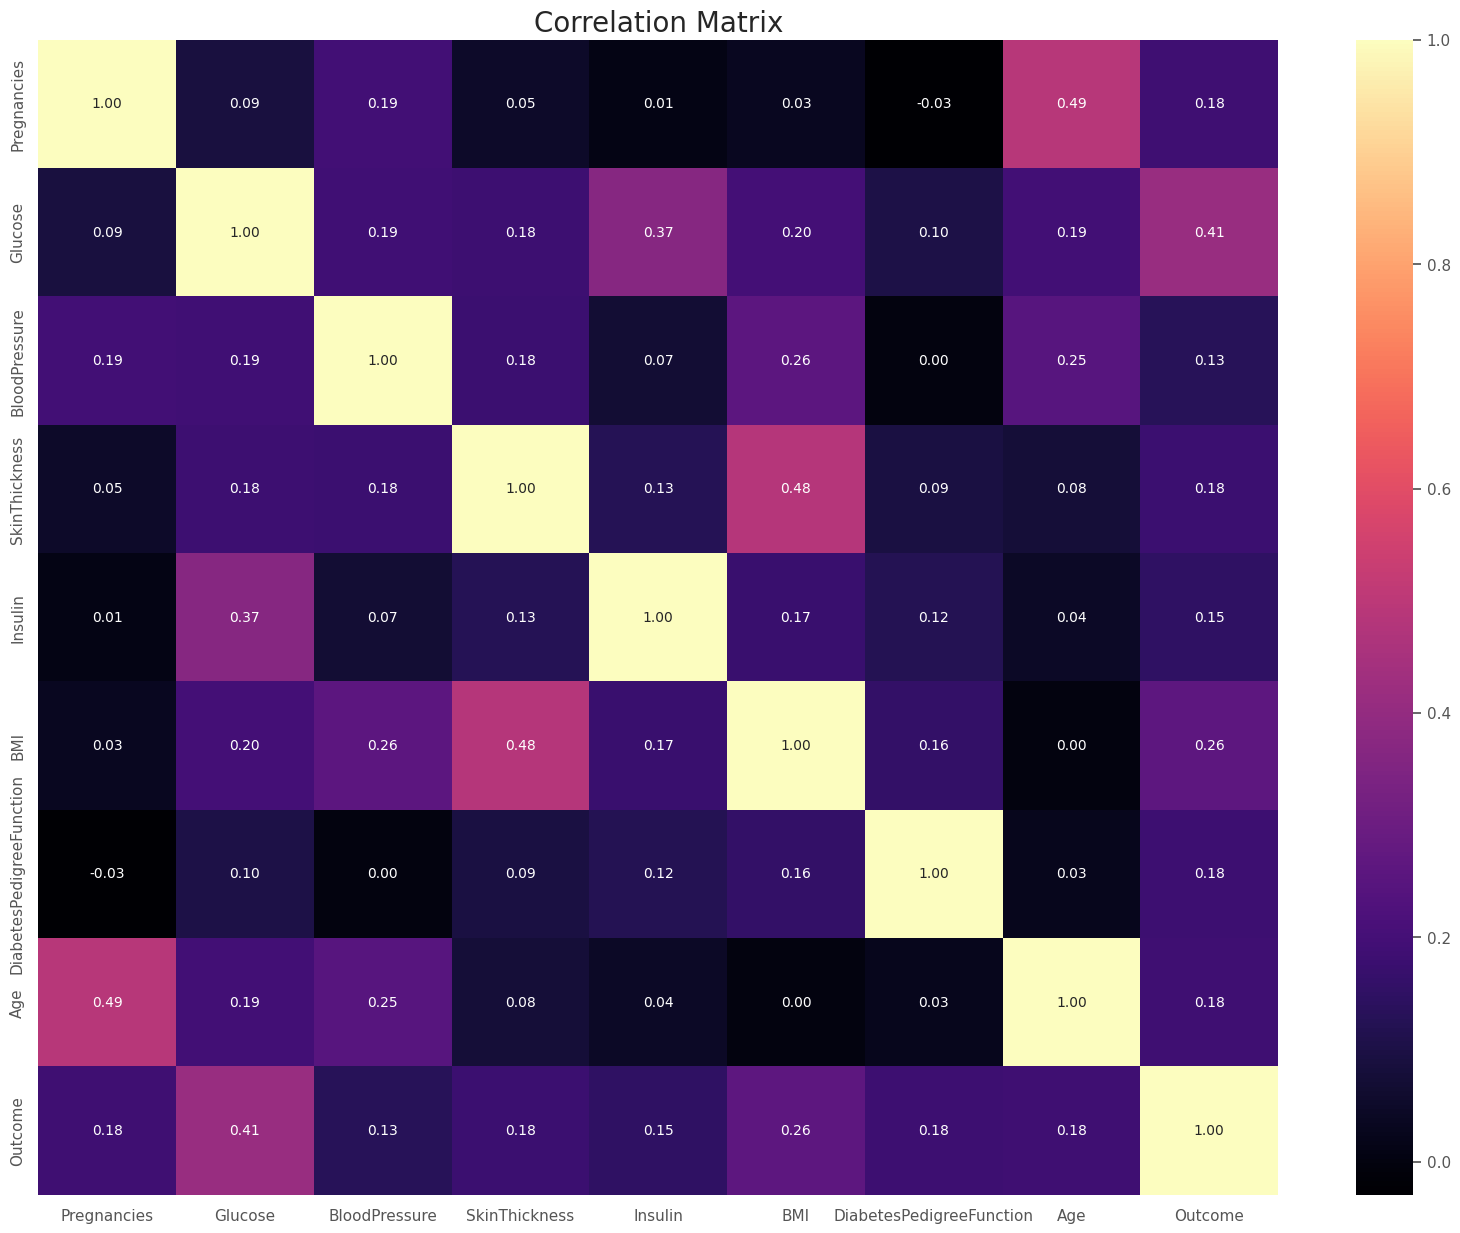

In [24]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [25]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)


In [27]:
# Data preprocessing Part
df.isnull().sum()

,0
Pregnancies,119
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,1
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,125.0,33.6,0.627,50,1
1,1.0,85,66,29,125.0,26.6,0.351,31,0
2,8.0,183,64,29,125.0,23.3,0.672,32,1
3,1.0,89,66,23,94.0,28.1,0.167,21,0
4,NaN,137,40,35,168.0,43.1,2.288,33,1


<Axes: >

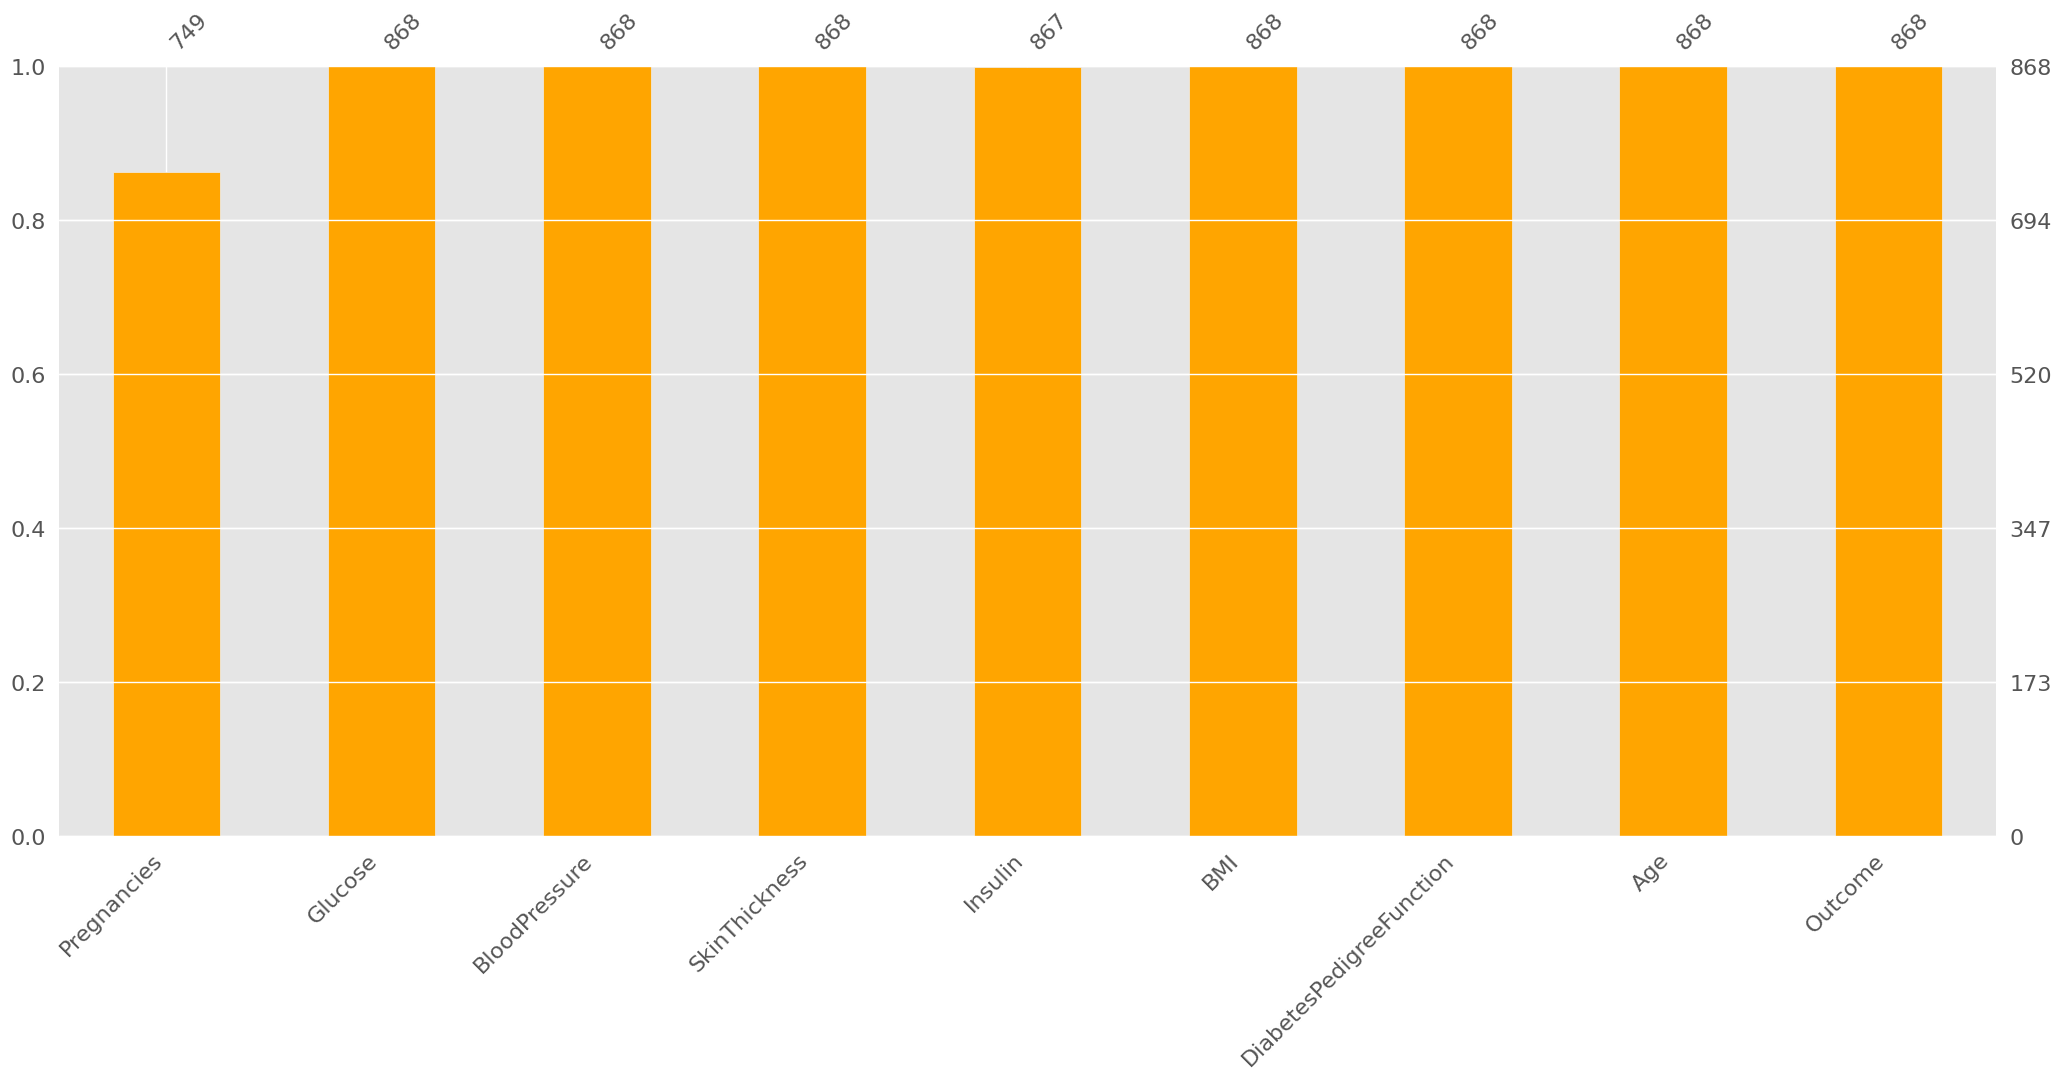

In [33]:
import missingno as msno
msno.bar(df, color="orange")

In [34]:
#median
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [35]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]


In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1


In [37]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


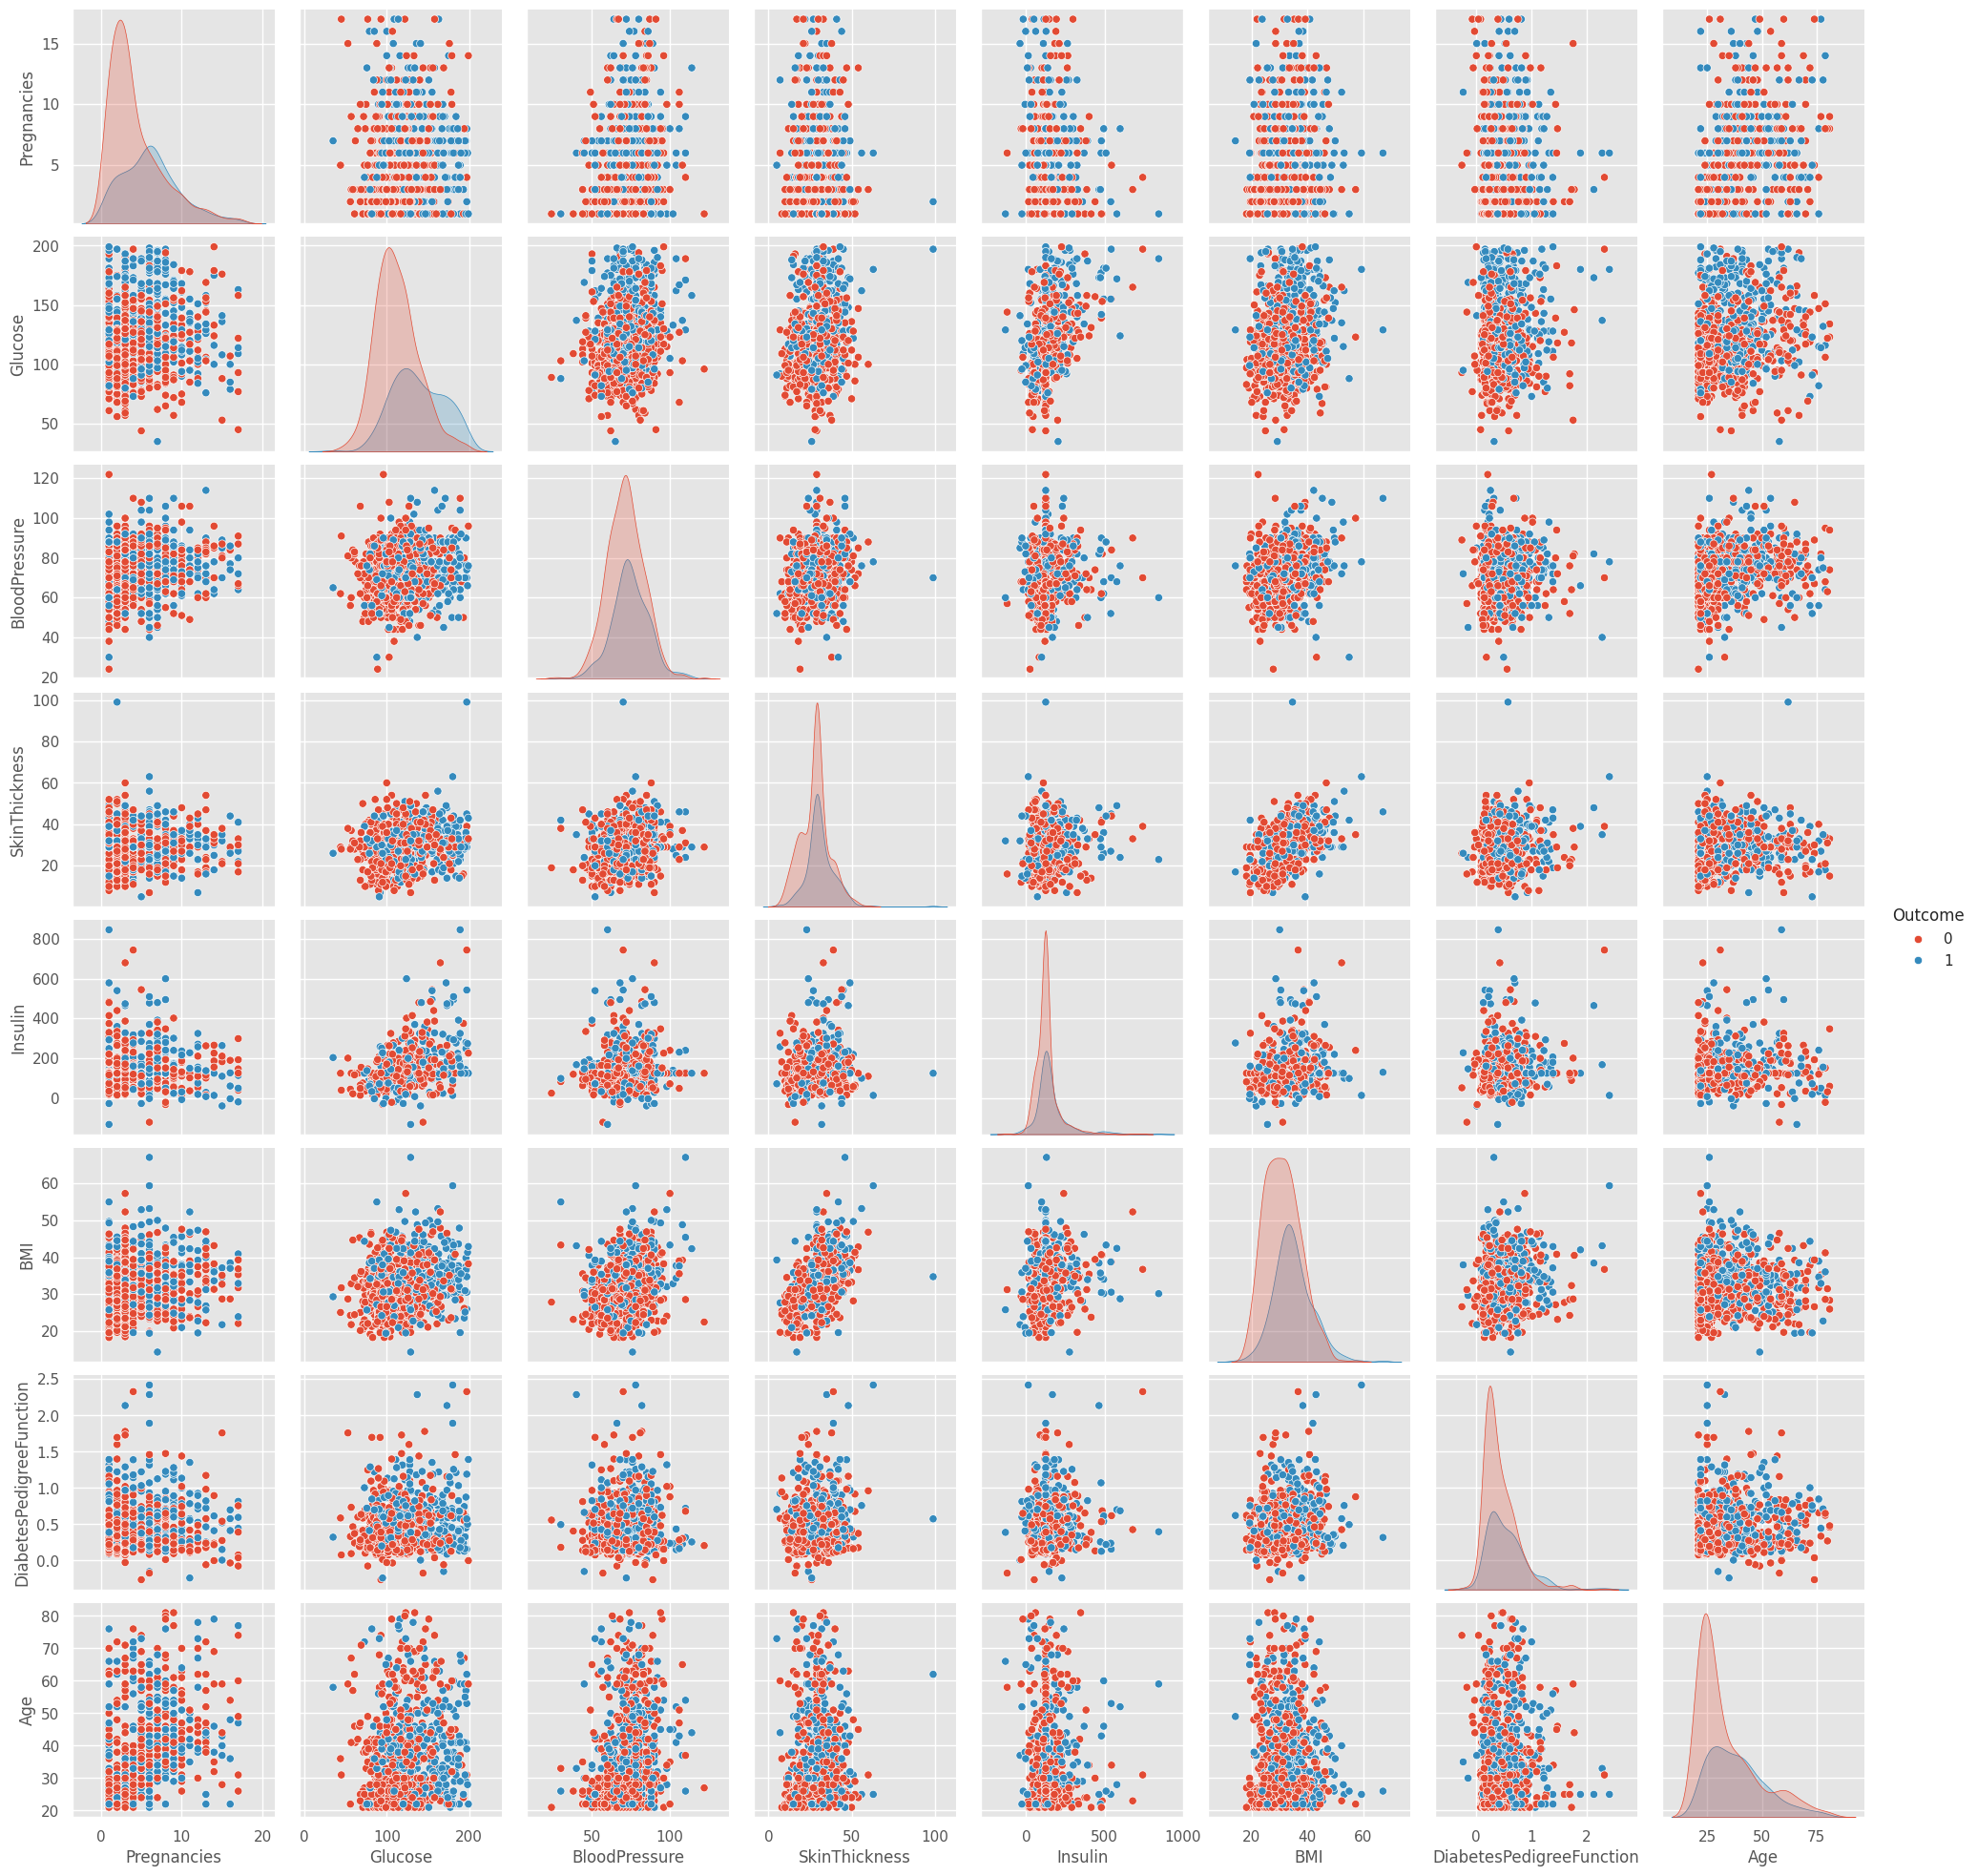

In [38]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [39]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

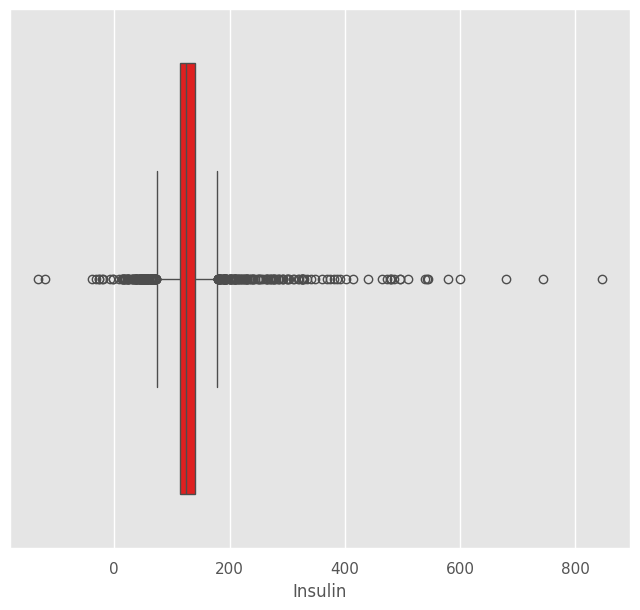

In [40]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [41]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

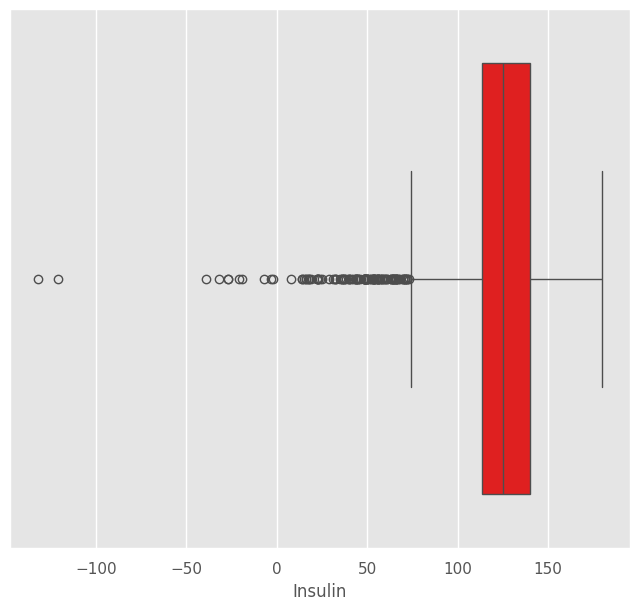

In [42]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [43]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

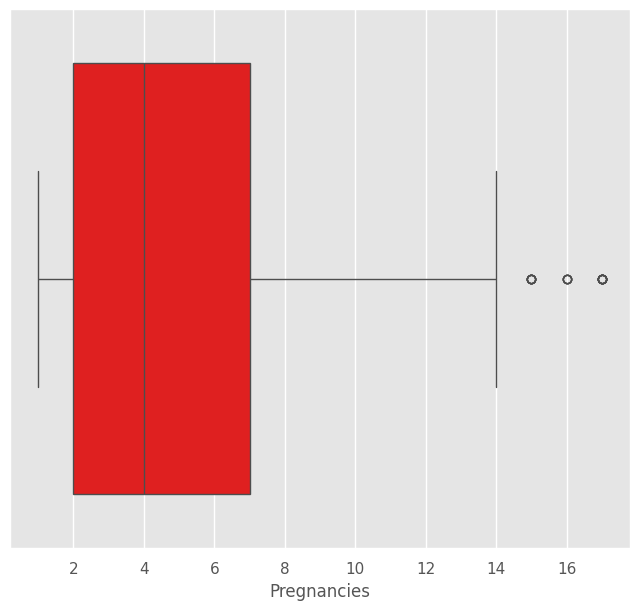

In [45]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [46]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-2.89860914, -2.22006955, -2.14620688, -2.11044898, -2.06844885,
       -1.96501582, -1.95416538, -1.8720009 , -1.80756641, -1.80488012,
       -1.80110863, -1.79606847, -1.73730995, -1.7105964 , -1.70777434,
       -1.67422641, -1.66398216, -1.63489945, -1.63209326, -1.61114812])

In [47]:
thresold = np.sort(df_scores)[7]

In [48]:
thresold

-1.8720008958543637

In [49]:
outlier = df_scores>thresold

In [50]:
df=df[outlier]

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1


In [52]:
df.shape

(860, 9)

<Axes: xlabel='Pregnancies'>

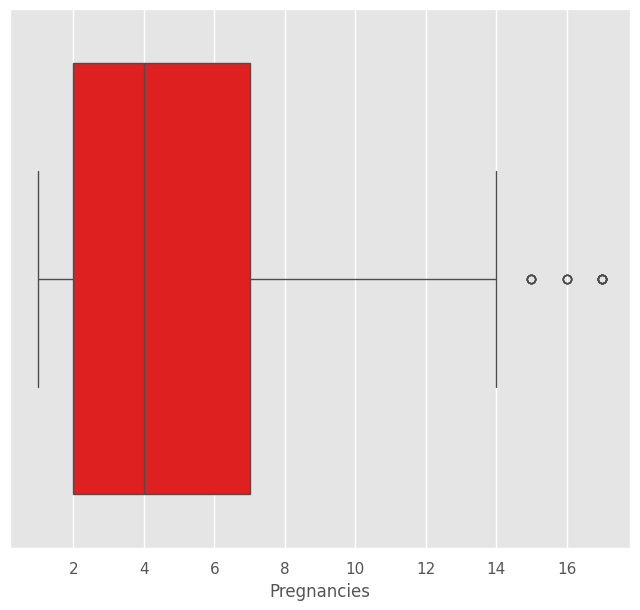

In [53]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [54]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [55]:
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [56]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0,Obesity 2
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1,Obesity 3


In [58]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1,Obesity 2,Normal
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1,Obesity 2,Normal
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [59]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1,Obesity 2,Normal,Secret
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1,Obesity 2,Normal,Secret
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [60]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72,35,125.0,33.6,0.627,50,1,False,True,False,False,False,True,False,False,False,True
1,1.0,85.0,66,29,125.0,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,183.0,64,29,125.0,23.3,0.672,32,1,False,True,False,False,False,True,False,False,False,True
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,6.0,137.0,40,35,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [61]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [62]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,True,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,True,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [63]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

cols = X.columns
index = X.index

X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,125.0,33.6,0.627,50
1,1.0,85.0,66,29,125.0,26.6,0.351,31
2,8.0,183.0,64,29,125.0,23.3,0.672,32
3,1.0,89.0,66,23,94.0,28.1,0.167,21
4,6.0,137.0,40,35,168.0,43.1,2.288,33


In [64]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.4,0.770186,0.000,0.666667,0.000000,0.142857,0.612468,1.041096
1,-0.6,-0.795031,-0.375,0.000000,0.000000,-0.626374,-0.083175,0.000000
2,0.8,1.639752,-0.500,0.000000,0.000000,-0.989011,0.725888,0.054795
3,-0.6,-0.695652,-0.375,-0.666667,-1.227723,-0.461538,-0.546937,-0.547945
4,0.4,0.496894,-2.000,0.666667,1.702970,1.186813,4.798929,0.109589


In [65]:
X = pd.concat([X, categorical_df], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.4,0.770186,0.000,0.666667,0.000000,0.142857,0.612468,1.041096,False,True,False,False,False,True,False,False,False,True
1,-0.6,-0.795031,-0.375,0.000000,0.000000,-0.626374,-0.083175,0.000000,False,True,False,False,False,True,False,True,False,False
2,0.8,1.639752,-0.500,0.000000,0.000000,-0.989011,0.725888,0.054795,False,True,False,False,False,True,False,False,False,True
3,-0.6,-0.695652,-0.375,-0.666667,-1.227723,-0.461538,-0.546937,-0.547945,False,True,False,False,False,True,False,True,False,False
4,0.4,0.496894,-2.000,0.666667,1.702970,1.186813,4.798929,0.109589,False,False,True,False,False,False,False,False,False,True


In [66]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [67]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Machine Learning Algo
# Logistic Regreesion
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_train, log_reg.predict(X_train))

0.748546511627907

In [70]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
confusion_matrix(y_test, y_pred)

array([[102,  11],
       [ 32,  27]])

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       113
           1       0.71      0.46      0.56        59

    accuracy                           0.75       172
   macro avg       0.74      0.68      0.69       172
weighted avg       0.74      0.75      0.73       172



In [72]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8066860465116279
0.7093023255813954
[[92 21]
 [29 30]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       113
           1       0.59      0.51      0.55        59

    accuracy                           0.71       172
   macro avg       0.67      0.66      0.67       172
weighted avg       0.70      0.71      0.70       172



In [73]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [74]:
# best_parameter
grid_search.best_params_

{'C': 1, 'gamma': 0.01}

In [75]:
grid_search.best_score_

0.7441552946154659

In [76]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7921511627906976
0.7325581395348837
[[97 16]
 [30 29]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       113
           1       0.64      0.49      0.56        59

    accuracy                           0.73       172
   macro avg       0.70      0.67      0.68       172
weighted avg       0.72      0.73      0.72       172



In [77]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.6453488372093024
[[80 33]
 [28 31]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       113
           1       0.48      0.53      0.50        59

    accuracy                           0.65       172
   macro avg       0.61      0.62      0.61       172
weighted avg       0.65      0.65      0.65       172



In [78]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [80]:
grid_search_dt.best_params_



{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [81]:
grid_search_dt.best_score_

0.7425274725274725

In [82]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7776162790697675
0.7383720930232558
[[98 15]
 [30 29]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       113
           1       0.66      0.49      0.56        59

    accuracy                           0.74       172
   macro avg       0.71      0.68      0.69       172
weighted avg       0.73      0.74      0.73       172



In [83]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [84]:
y_pred = rand_clf.predict(X_test)
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956395348837209
0.7616279069767442
[[94 19]
 [22 37]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       113
           1       0.66      0.63      0.64        59

    accuracy                           0.76       172
   macro avg       0.74      0.73      0.73       172
weighted avg       0.76      0.76      0.76       172



In [85]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [86]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [87]:
grid_search_gbc.best_score_

0.7486786018755328

In [88]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [89]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8938953488372093
0.7441860465116279
[[98 15]
 [29 30]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       113
           1       0.67      0.51      0.58        59

    accuracy                           0.74       172
   macro avg       0.72      0.69      0.70       172
weighted avg       0.74      0.74      0.73       172



In [103]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Initialize the HistGradientBoostingClassifier
hist_gbc = HistGradientBoostingClassifier(learning_rate=0.01, max_depth=10)

# Train the model
hist_gbc.fit(X_train, y_train)

# Predictions
y_pred = hist_gbc.predict(X_test)


In [104]:

# Accuracy scores
print(accuracy_score(y_train, hist_gbc.predict(X_train)))
hist_gbc_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))


0.8357558139534884
0.7151162790697675
[[98 15]
 [34 25]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       113
           1       0.62      0.42      0.51        59

    accuracy                           0.72       172
   macro avg       0.68      0.65      0.65       172
weighted avg       0.70      0.72      0.70       172



In [105]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier',
              'Gradient Boosting Classifier', 'HistGradient Boosting Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4),
              100*round(rand_acc,4), 100*round(gbc_acc,4), 100*round(hist_gbc_acc,4)]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest Classifier,76.16
0,Logistic Regression,75.00
5,Gradient Boosting Classifier,74.42
3,Decision Tree Classifier,73.84
2,SVM,73.26
6,HistGradient Boosting Classifier,71.51
1,KNN,70.93


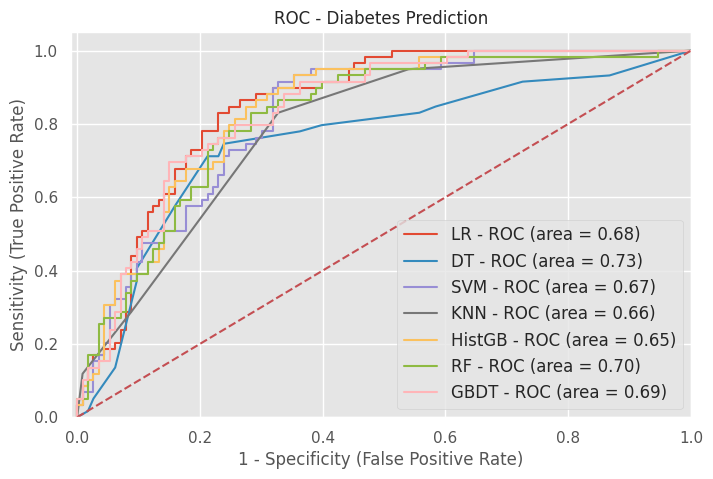

In [106]:
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics

# Save the best model
model = hist_gbc_acc
pickle.dump(model, open("diabetes.pkl", 'wb'))

# Define models for ROC curve comparison
plt.figure(figsize=(8, 5))
models = [
    {
        'label': 'LR',
        'model': log_reg,
    },
    {
        'label': 'DT',
        'model': DT,
    },
    {
        'label': 'SVM',
        'model': svc,
    },
    {
        'label': 'KNN',
        'model': knn,
    },
    {
        'label': 'HistGB',
        'model': hist_gbc,  # Changed from xgb to hist_gbc
    },
    {
        'label': 'RF',
        'model': rand_clf,
    },
    {
        'label': 'GBDT',
        'model': gbc,
    }
]

# Plot ROC curves for all models
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))

    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Save the ROC plot
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


[75.0, 73.83999999999999, 73.26, 70.93, 71.50999999999999, 76.16000000000001, 74.42]
[68.01, 67.38, 67.5, 66.13, 64.55, 70.81, 68.78999999999999]


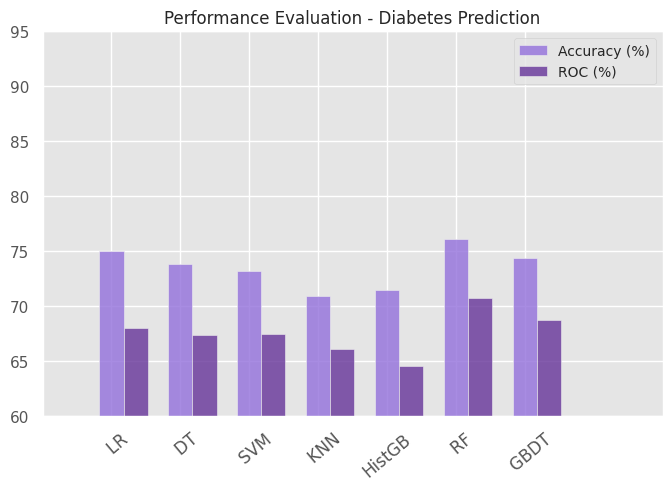

In [107]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# List of models
models = [
    {
        'label': 'LR',
        'model': log_reg,
    },
    {
        'label': 'DT',
        'model': DT,
    },
    {
        'label': 'SVM',
        'model': svc,
    },
    {
        'label': 'KNN',
        'model': knn,
    },
    {
        'label': 'HistGB',  # Changed from 'XGBoost' to 'HistGB'
        'model': hist_gbc,  # Changed from xgb to hist_gbc
    },
    {
        'label': 'RF',
        'model': rand_clf,
    },
    {
        'label': 'GBDT',
        'model': gbc,
    }
]

# Accuracy scores for each model
means_roc = []
means_accuracy = [
    100 * round(log_reg_acc, 4),
    100 * round(dt_acc, 4),
    100 * round(svc_acc, 4),
    100 * round(knn_acc, 4),
    100 * round(hist_gbc_acc, 4),  # Changed from xgb_acc to hist_gbc_acc
    100 * round(rand_acc, 4),
    100 * round(gbc_acc, 4)
]

# Calculate ROC AUC scores for each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    auc = 100 * round(auc, 4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# Data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity, color='mediumpurple', label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity, color='rebeccapurple', label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'HistGB', '   RF', '   GBDT'),
           rotation=40, ha='center', fontsize=12)

plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
